Question 1~6

In [1]:
import os 

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'DMdata',
 'Homework#2 (1).pdf',
 'Homework2_Datat_MemoryExperimet',
 'Homework2_Datat_MemoryExperimet.zip',
 'HW2-Copy1.ipynb',
 'HW2_최종본.ipynb',
 'QQQQQQuestionnnnnn!!!!.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 '__MACOSX']

In [3]:
IDs = ['01', '02', '03', '04', '05',
       '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [5]:
os.listdir('./DMdata')

['DM01',
 'DM02',
 'DM03',
 'DM04',
 'DM05',
 'DM06',
 'DM07',
 'DM08',
 'DM09',
 'DM10',
 'DM11',
 'DM12',
 'DM13',
 'DM14',
 'DM15',
 'DM16',
 'DM17',
 'DM18',
 'DM19',
 'DM20',
 'DM21',
 'DM22',
 'DM23',
 'DM24',
 'DM25',
 'DM26',
 'DM27',
 'DM28',
 'DM29',
 'DM30',
 'DM31']

Question 7

In [6]:
tmp_t_01=pd.read_csv('./DMdata/DM01/DM01_test.txt', sep='\t', index_col=False)

In [7]:
tmp_t_01

,Trial,Object_ID,Task_Type,Stim_onset1,RT1,Res1,Stim_onset2,RT2,Res2
0,1,72,1,1017,3863,2,0,0,0
1,2,122,1,7632,3480,4,0,0,0
2,3,114,1,13866,1264,3,0,0,0
3,4,108,0,17882,1464,1,21083,3549,3
4,5,145,0,25765,1631,1,29133,1032,3
...,...,...,...,...,...,...,...,...,...
523,524,93,1,2369157,597,3,0,0,0
524,525,144,1,2372507,3264,3,0,0,0
525,526,164,0,2378523,714,1,2380975,615,5
526,527,98,0,2382607,631,1,2384975,398,1


In [8]:
def sort_DM_data_07(tmp_t):
    probability_list=[]
    tmp_t_ind=tmp_t.set_index(['Task_Type','Res1'])
    tmp_t_ind=tmp_t_ind.sort_index(level=['Task_Type','Res1'], ascending=True)
    
    try:
        HIT_HC=tmp_t_ind.loc[0].loc[1]
        HIT_HC['Sort Type']= 'HIT-HC'
    except:
        tmp_df_1={'0':0}
        HIT_HC=tmp_df_1
        HIT_HC['Sort Type']= 'HIT-HC'
        
    try: 
        HIT_LC=tmp_t_ind.loc[0].loc[2]
        HIT_LC['Sort Type']= 'HIT-LC'
    except:
        tmp_df_2={'0':0}
        HIT_LC=tmp_df_2
        HIT_LC['Sort Type']='HIT-LC'
    
    try:
        MISS_LC=tmp_t_ind.loc[0].loc[3]
        MISS_LC['Sort Type']= 'MISS-LC'
    except:
        tmp_df_3={'0':0}
        MISS_LC=tmp_df_3
        MISS_LC['Sort Type']='MISS-LC'
           
    try:    
        MISS_HC=tmp_t_ind.loc[0].loc[4]
        MISS_HC['Sort Type']= 'MISS-HC'
    except:
        tmp_df_4={'0':0}
        MISS_HC=tmp_df_4
        MISS_HC['Sort Type']= 'MISS-HC'
            
    try:
        FA_HC=tmp_t_ind.loc[1].loc[1]
        FA_HC['Sort Type']= 'FA-HC'
    except:
        tmp_df_5={'0':0}
        FA_HC=tmp_df_5
        FA_HC['Sort Type']= 'FA-HC'
            
    try:
        FA_LC=tmp_t_ind.loc[1].loc[2]
        FA_LC['Sort Type']= 'FA-LC'
    except:
        tmp_df_6={'0':0}
        FA_LC=tmp_df_6
        FA_LC['Sort Type']= 'FA-LC'
    
    try:
        CR_LC=tmp_t_ind.loc[1].loc[3]
        CR_LC['Sort Type']= 'CR-LC'
    except:
        tmp_df_7={'0':0}
        CR_LC=tmp_df_7
        CR_LC['Sort Type']= 'CR-LC'
            
    try:
        CR_HC=tmp_t_ind.loc[1].loc[4]
        CR_HC['Sort Type']= 'CR-HC'
    except:
        tmp_df_8={'0':0}
        CR_HC=tmp_df_8
        CR_HC['Sort Type']= 'CR-HC'
    
    sort_type=['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
    types=[HIT_HC, HIT_LC, MISS_LC, MISS_HC, FA_HC, FA_LC, CR_LC, CR_HC]
    len_types=[]

    for x in range(len(types)):
        if len(types[x])== 2:
            len_types.append(0)
        else:
            len_types.append(len(types[x]))
    
    numlist=list(range(len(types)))
    DM_list=[]
    probability_list_tmp=[]
    
    for a in range(1,32):
        DM_list.append('DM{}'.format(a))
    
    for a,b in zip(DM_list,len_types):
        probability=b/(sum(len_types)/2)
        ##### There are same number of Ttpyes.
        ##### So, to distinguish the probability of 'old' and 'new', I divide the sum(len)types with 2.
        probability_list_tmp.append(probability)
    probability_list.append(probability_list_tmp)
    print(probability_list)

In [9]:
sort_DM_data_07(tmp_t_01)

[[0.6704545454545454, 0.14015151515151514, 0.10606060606060606, 0.08333333333333333, 0.030303030303030304, 0.0946969696969697, 0.3446969696969697, 0.5303030303030303]]


Question 8

In [10]:
def sort_type_prop_8(tmp_t):

    tmp_t_ind=tmp_t.set_index(['Task_Type','Res1'])
    tmp_t_ind=tmp_t_ind.sort_index(level=['Task_Type','Res1'], ascending=True)
    
    try:
        HIT_HC=tmp_t_ind.loc[0].loc[1]
        HIT_HC['Sort Type']= 'HIT-HC'
    except:
        tmp_df_1={'0':0}
        HIT_HC=tmp_df_1
        HIT_HC['Sort Type']= 'HIT-HC'
        
    try: 
        HIT_LC=tmp_t_ind.loc[0].loc[2]
        HIT_LC['Sort Type']= 'HIT-LC'
    except:
        tmp_df_2={'0':0}
        HIT_LC=tmp_df_2
        HIT_LC['Sort Type']='HIT-LC'
        
    try:
        MISS_LC=tmp_t_ind.loc[0].loc[3]
        MISS_LC['Sort Type']= 'MISS-LC'
    except:
        tmp_df_3={'0':0}
        MISS_LC=tmp_df_3
        MISS_LC['Sort Type']='MISS-LC'
      
    try:    
        MISS_HC=tmp_t_ind.loc[0].loc[4]
        MISS_HC['Sort Type']= 'MISS-HC'
    except:
        tmp_df_4={'0':0}
        MISS_HC=tmp_df_4
        MISS_HC['Sort Type']= 'MISS-HC'
       
    try:
        FA_HC=tmp_t_ind.loc[1].loc[1]
        FA_HC['Sort Type']= 'FA-HC'
    except:
        tmp_df_5={'0':0}
        FA_HC=tmp_df_5
        FA_HC['Sort Type']= 'FA-HC'
        
    try:
        FA_LC=tmp_t_ind.loc[1].loc[2]
        FA_LC['Sort Type']= 'FA-LC'
    except:
        tmp_df_6={'0':0}
        FA_LC=tmp_df_6
        FA_LC['Sort Type']= 'FA-LC'
    
    try:
        CR_LC=tmp_t_ind.loc[1].loc[3]
        CR_LC['Sort Type']= 'CR-LC'
    except:
        tmp_df_7={'0':0}
        CR_LC=tmp_df_7
        CR_LC['Sort Type']= 'CR-LC'
       
    try:
        CR_HC=tmp_t_ind.loc[1].loc[4]
        CR_HC['Sort Type']= 'CR-HC'
    except:
        tmp_df_8={'0':0}
        CR_HC=tmp_df_8
        CR_HC['Sort Type']= 'CR-HC'
       
    sort_type=['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
    types=[HIT_HC, HIT_LC, MISS_LC, MISS_HC, FA_HC, FA_LC, CR_LC, CR_HC]
    len_types=[]

    for x in range(len(types)):
        if len(types[x])== 2:
            len_types.append(0)
        else:
            len_types.append(len(types[x]))
    
    numlist=list(range(len(types)))

        
    for x,y in zip(numlist, len_types):
        probability=y/(sum(len_types)/2)
        print('The probability of', sort_type[x], 'is', probability,'.')
 

In [11]:
for ID in IDs:
    tmp_t = pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(ID, ID), sep='\t', index_col = False)
    print(sort_type_prop_8(tmp_t))

The probability of HIT-HC is 0.6704545454545454 .
The probability of HIT-LC is 0.14015151515151514 .
The probability of MISS-LC is 0.10606060606060606 .
The probability of MISS-HC is 0.08333333333333333 .
The probability of FA-HC is 0.030303030303030304 .
The probability of FA-LC is 0.0946969696969697 .
The probability of CR-LC is 0.3446969696969697 .
The probability of CR-HC is 0.5303030303030303 .
None
The probability of HIT-HC is 0.4318181818181818 .
The probability of HIT-LC is 0.2916666666666667 .
The probability of MISS-LC is 0.14393939393939395 .
The probability of MISS-HC is 0.13257575757575757 .
The probability of FA-HC is 0.07196969696969698 .
The probability of FA-LC is 0.2878787878787879 .
The probability of CR-LC is 0.3143939393939394 .
The probability of CR-HC is 0.32575757575757575 .
None
The probability of HIT-HC is 0.6098484848484849 .
The probability of HIT-LC is 0.14015151515151514 .
The probability of MISS-LC is 0.14015151515151514 .
The probability of MISS-HC is 0.

Question 9

In [12]:
probability_list=[]
def sort_DM_data_09(tmp_t):
    
    tmp_t_ind=tmp_t.set_index(['Task_Type','Res1'])
    tmp_t_ind=tmp_t_ind.sort_index(level=['Task_Type','Res1'], ascending=True)

    try:
        HIT_HC=tmp_t_ind.loc[0].loc[1]
        HIT_HC['Sort Type']= 'HIT-HC'
    except:
        tmp_df_1={'0':0}
        HIT_HC=tmp_df_1
        HIT_HC['Sort Type']= 'HIT-HC'
        
    try: 
        HIT_LC=tmp_t_ind.loc[0].loc[2]
        HIT_LC['Sort Type']= 'HIT-LC'
    except:
        tmp_df_2={'0':0}
        HIT_LC=tmp_df_2
        HIT_LC['Sort Type']='HIT-LC'
        
    try:
        MISS_LC=tmp_t_ind.loc[0].loc[3]
        MISS_LC['Sort Type']= 'MISS-LC'
    except:
        tmp_df_3={'0':0}
        MISS_LC=tmp_df_3
        MISS_LC['Sort Type']='MISS-LC'
       
    try:    
        MISS_HC=tmp_t_ind.loc[0].loc[4]
        MISS_HC['Sort Type']= 'MISS-HC'
    except:
        tmp_df_4={'0':0}
        MISS_HC=tmp_df_4
        MISS_HC['Sort Type']= 'MISS-HC'
       
    try:
        FA_HC=tmp_t_ind.loc[1].loc[1]
        FA_HC['Sort Type']= 'FA-HC'
    except:
        tmp_df_5={'0':0}
        FA_HC=tmp_df_5
        FA_HC['Sort Type']= 'FA-HC'
        
    try:
        FA_LC=tmp_t_ind.loc[1].loc[2]
        FA_LC['Sort Type']= 'FA-LC'
    except:
        tmp_df_6={'0':0}
        FA_LC=tmp_df_6
        FA_LC['Sort Type']= 'FA-LC'
    
    try:
        CR_LC=tmp_t_ind.loc[1].loc[3]
        CR_LC['Sort Type']= 'CR-LC'
    except:
        tmp_df_7={'0':0}
        CR_LC=tmp_df_7
        CR_LC['Sort Type']= 'CR-LC'
       
    try:
        CR_HC=tmp_t_ind.loc[1].loc[4]
        CR_HC['Sort Type']= 'CR-HC'
    except:
        tmp_df_8={'0':0}
        CR_HC=tmp_df_8
        CR_HC['Sort Type']= 'CR-HC'
        
    sort_type=['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
    types=[HIT_HC, HIT_LC, MISS_LC, MISS_HC, FA_HC, FA_LC, CR_LC, CR_HC]
    len_types=[]

    for x in range(len(types)):
        if len(types[x])== 2:
            len_types.append(0)
        else:
            len_types.append(len(types[x]))
    numlist=list(range(len(types)))
    DM_list=[]
    
    for a in range(1,32):
        DM_list.append('DM{}'.format(a))
    
    probability_list_tmp=[]
    
    for a,b in zip(DM_list,len_types):
        probability=b/(sum(len_types)/2)
        probability_list_tmp.append(probability)
    probability_list.append(probability_list_tmp)

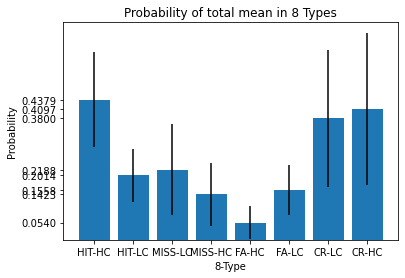

In [13]:
for ID in IDs:
    tmp_t = pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(ID, ID), sep='\t', index_col = False)
    sort_DM_data_09(tmp_t)

list_01=[]
list_02=[]
list_03=[]
list_04=[]
list_05=[]
list_06=[]
list_07=[]
list_08=[]

for x in (range(0,31)):
    for y in (range(0,8)):
        tmp=probability_list[x][y]
        if y==0:
            list_01.append(tmp)
        if y==1:
            list_02.append(tmp)
        if y==2:
            list_03.append(tmp)
        if y==3:
            list_04.append(tmp)
        if y==4:
            list_05.append(tmp)
        if y==5:
            list_06.append(tmp)
        if y==6:
            list_07.append(tmp)
        if y==7:
            list_08.append(tmp)
sort_type=['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
total_mean_list=[]
std_list=[]
total_mean_list.append(np.mean(list_01))
total_mean_list.append(np.mean(list_02))
total_mean_list.append(np.mean(list_03))
total_mean_list.append(np.mean(list_04))
total_mean_list.append(np.mean(list_05))
total_mean_list.append(np.mean(list_06))
total_mean_list.append(np.mean(list_07))
total_mean_list.append(np.mean(list_08))
std_list.append(np.std(list_01))
std_list.append(np.std(list_02))
std_list.append(np.std(list_03))
std_list.append(np.std(list_04))
std_list.append(np.std(list_05))
std_list.append(np.std(list_06))
std_list.append(np.std(list_07))
std_list.append(np.std(list_08))

y = total_mean_list
x = np.arange(1,9)
#yerr= std_list
yerr=std_list
xlabel= sort_type
plt.bar(x,y,yerr=std_list)
plt.xticks(x,xlabel)
plt.yticks(y)
plt.title('Probability of total mean in 8 Types')
plt.xlabel('8-Type')
plt.ylabel('Probability')
plt.show()    

Question 10

In [14]:
def location_prob_10(loc):
    
    IDs = os.listdir(loc)
    
    Types_loc={'HIT-HC' :[], 'HIT-LC':[], 'MISS-LC':[], 'MISS-HC':[]}
    Keys = list(Types_loc.keys()) 
    
    for Id in IDs:
        tmp=[]
        tmp_s=pd.read_csv('{}/{}/{}_study.txt'.format(loc,Id, Id), sep='\t', index_col=False)
        tmp_t=pd.read_csv('{}/{}/{}_test.txt'.format(loc,Id, Id), sep='\t', index_col=False)
        
        Loc_ID=tmp_s[['ObjID','LocID']]
        Loc_ID.rename(columns={"ObjID":"Object_ID"}, inplace=True)
        Object_ID=tmp_t[['Object_ID','Res1','Res2','Task_Type']]

        condition_1 = Object_ID['Task_Type']==0
        subset_object_tmp = Object_ID[condition_1]

        Loc_ID=Loc_ID.sort_values(by=['Object_ID'], axis=0)
        Object_ID=subset_object_tmp.sort_values(by=['Object_ID'], axis=0)

        df_loc=pd.merge(Loc_ID, Object_ID, on="Object_ID")
        
        subset_loc_1 = df_loc[df_loc['Res1']==1]
        subset_loc_2 = df_loc[df_loc['Res1']==2]
        subset_loc_3 = df_loc[df_loc['Res1']==3]
        subset_loc_4 = df_loc[df_loc['Res1']==4]
        loc_1 = subset_loc_1[subset_loc_1['LocID']==subset_loc_1['Res2']]
        loc_2 = subset_loc_2[subset_loc_2['LocID']==subset_loc_2['Res2']]
        loc_3 = subset_loc_3[subset_loc_3['LocID']==subset_loc_3['Res2']]
        loc_4 = subset_loc_4[subset_loc_4['LocID']==subset_loc_4['Res2']]
        values1=len(loc_1)/len(subset_loc_1)
        values2=len(loc_2)/len(subset_loc_2)
        values3=len(loc_3)/len(subset_loc_3)
        values4=len(loc_4)/len(subset_loc_4)
        tmp.append(values1)
        tmp.append(values2)
        tmp.append(values3)
        tmp.append(values4)
               
        for v in range(4):
            Types_loc[Keys[v]].append(tmp[v])
    
    Types_loc_df=pd.DataFrame(Types_loc)
    display(Types_loc_df)
    sns.barplot(data=Types_loc_df, ci="sd",capsize=.2)


c:\users\한고은\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,HIT-HC,HIT-LC,MISS-LC,MISS-HC
0,0.807910,0.216216,0.107143,0.000000
1,0.447368,0.311688,0.000000,0.000000
2,0.416149,0.216216,0.054054,0.000000
3,0.543478,0.500000,0.600000,0.342466
4,0.322581,0.000000,0.000000,0.000000
5,0.527273,0.404762,0.200000,0.097826
6,0.443038,0.202703,0.125000,0.063492
7,0.485981,0.028986,0.015625,0.000000
8,0.728571,0.214286,0.000000,0.000000
9,0.426230,0.105263,0.000000,0.000000


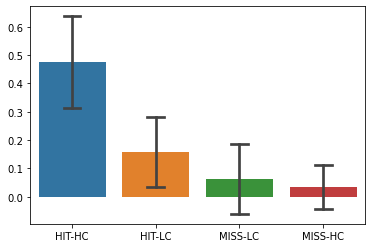

In [15]:
location_prob_10('./DMdata')

In [16]:
def location_prob_11(loc):
    
    IDs = os.listdir(loc)
    
    Types_loc={'HIT-HC' :[], 'HIT-LC':[], 'MISS-LC':[], 'MISS-HC':[]}

    Keys = list(Types_loc.keys()) 
    
    for Id in IDs:
        tmp=[]
        tmp_s=pd.read_csv('{}/{}/{}_study.txt'.format(loc,Id, Id), sep='\t', index_col=False)
        tmp_t=pd.read_csv('{}/{}/{}_test.txt'.format(loc,Id, Id), sep='\t', index_col=False)
        
        Loc_ID=tmp_s[['ObjID','LocID']]
        Loc_ID.rename(columns={"ObjID":"Object_ID"}, inplace=True)
        Object_ID=tmp_t[['Object_ID','Res1','Res2','Task_Type']]

        condition_1 = Object_ID['Task_Type']==0
        subset_object_tmp = Object_ID[condition_1]

        Loc_ID=Loc_ID.sort_values(by=['Object_ID'], axis=0)
        Object_ID=subset_object_tmp.sort_values(by=['Object_ID'], axis=0)

        df_loc=pd.merge(Loc_ID, Object_ID, on="Object_ID")
        
        subset_loc_1 = df_loc[df_loc['Res1']==1]
        subset_loc_2 = df_loc[df_loc['Res1']==2]
        subset_loc_3 = df_loc[df_loc['Res1']==3]
        subset_loc_4 = df_loc[df_loc['Res1']==4]
        loc_1 = subset_loc_1[subset_loc_1['LocID']==subset_loc_1['Res2']]
        loc_2 = subset_loc_2[subset_loc_2['LocID']==subset_loc_2['Res2']]
        loc_3 = subset_loc_3[subset_loc_3['LocID']==subset_loc_3['Res2']]
        loc_4 = subset_loc_4[subset_loc_4['LocID']==subset_loc_4['Res2']]
        values1=len(loc_1)/len(subset_loc_1)
        values2=len(loc_2)/len(subset_loc_2)
        values3=len(loc_3)/len(subset_loc_3)
        values4=len(loc_4)/len(subset_loc_4)
        tmp.append(values1)
        tmp.append(values2)
        tmp.append(values3)
        tmp.append(values4)
        
               
        for v in range(4):
            Types_loc[Keys[v]].append(tmp[v])
    
    Types_loc_df=pd.DataFrame(Types_loc)
    display(Types_loc_df)
    sns.barplot(data=Types_loc_df, ci="sd",capsize=.2)
    plt.axhline(y=0.25, color='B', linewidth=1)

c:\users\한고은\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,HIT-HC,HIT-LC,MISS-LC,MISS-HC
0,0.807910,0.216216,0.107143,0.000000
1,0.447368,0.311688,0.000000,0.000000
2,0.416149,0.216216,0.054054,0.000000
3,0.543478,0.500000,0.600000,0.342466
4,0.322581,0.000000,0.000000,0.000000
5,0.527273,0.404762,0.200000,0.097826
6,0.443038,0.202703,0.125000,0.063492
7,0.485981,0.028986,0.015625,0.000000
8,0.728571,0.214286,0.000000,0.000000
9,0.426230,0.105263,0.000000,0.000000


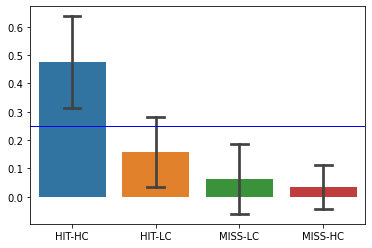

In [157]:
location_prob_11('./DMdata')